# **Linear Regression**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate the X and y vectors
X = 2 * np.random.rand(100, 1)

# y = intercept + theta_1 * X + error
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, '$y$')

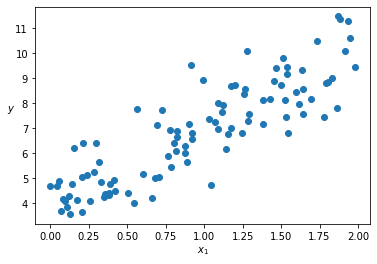

In [ ]:
# Visualize the data
plt.scatter(X, y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

## The Normal Equation

To find the value of *$\theta$* that minimizes the cost function, there is a *closed-form* -in other words, a mathematical equation, that gives the rsult directly. This is called the *Normal Equation*

$$ \hat{\theta} = (X^TX)^{-1} \cdot X^T \cdot y$$

In [ ]:
# Lets compute thetha hat
# This appends a set of arrays as a column array
X_b = np.c_[np.ones((100, 1)), X]

# Compute the best thetha with the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Show the best theta
theta_best

array([[3.98463541],
       [3.00502184]])

In [ ]:
# Now you can make predictions using best theta vector
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

# Show X_new_b
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
# Predict
y_predict = X_new_b.dot(theta_best)

# Show the prediction
y_predict

array([[3.9696747 ],
       [9.84008278]])

Text(0, 0.5, '$y$')

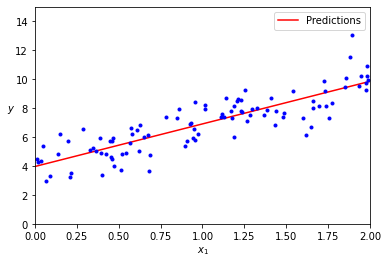

In [ ]:
# Plot the model predictions

plt.plot(X_new, y_predict, "r-", label="Predictions") # Predicting a set of two points
plt.plot(X, y, "b.") # Scatter plot like
plt.axis([0,2,0,15]) # Change the axis [x_min, x_max, y_min, y_max]

# Add a legend
plt.legend()

# Add axis labels
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

## Linear Regression with Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lin_reg = LinearRegression()

# Fit the model with the data
lin_reg.fit(X, y)

# Call the intercept and the feature's coefficient
lin_reg.intercept_, lin_reg.coef_

(array([3.9696747]), array([[2.93520404]]))

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function. *(The name stands for "Ordinary least squares")*, which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

# Call the thethe best svd
theta_best_svd

array([[3.9696747 ],
       [2.93520404]])

This function computes **$\theta = X^+ \cdot y$**, where **$X^+$** is the *pseudoinverse* of **_X_** (specially the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the *pseudoinverse* directly.

*SVD* stands for *Singular Value Decomposition*, is the standar matrix factorization technique used in computing the *pseudoinverse*. 

*SVD* can decompose the training set matrix *X* into the matri multiplication of three matrices. The pseudoinverse is computed as:

$$X^+ = V \Sigma^+ U^T$$

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.9696747 ],
       [2.93520404]])

As conclusion:

- `LinearRegression().fit(X, y)`
- `np.lingalg.lstsq(X_b, y, rcond=1e-6)`
- `np.linalg.pinv(X_b).dot(y)`

Are pretty much the same thing for computing the **best thetas**.

## **Gradient Descent**

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problemas. The general idea of *Gradient Descent* is to tweak parameters iteratively in order to minimize a cost function.

An important parameter in *Gradient Descent* is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to cnvernge, which will take a long time.

Fortunately, the **MSE** cost function for a Linear Regression model happens to be a *convex function*. This implies that there are no local minima, **just one global minimum**.

When using *Gradient Descent*, you should ensure that all features have a similar scale (e.g., using Scikit-Learn's `StandardScaler` class), or else it will take much longer to converge.

## **Batch Gradient Descent**

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. IN other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit.

The *Batch Gradient Descent* algorithm uses the **whole batch of trainig data** at every step. Is terribly slow on very large training sets.

In [ ]:
# Let's look at a quick implementation of this algorithm
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # Random initialization

# Show theta
theta

array([[0.53545532],
       [0.39995315]])

In [ ]:
for iterations in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

# Show the Batch Gradient Descent (iterative algorithm of whole traing set) results
theta

array([[3.98463541],
       [3.00502184]])

## **Stochastic Gradient Descent**

*Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradientes based only on that single instance.

- Makes the algorith much faster and low resource consuming.
- Less regular than *Batch Gradient Descent*, reaching **good** final parameters but not **optimal**.

In [ ]:
# This code implements Stochastic GRadient DEscent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m) # Get a random instance
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

# Show the results from the Stochastic Gradient Descent
theta

array([[3.99030255],
       [2.98527107]])

In [ ]:
from sklearn.linear_model import SGDRegressor

# Select and fit the model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1).fit(X, y.ravel())

# Show the parameter's coefficient and intercept
sgd_reg.intercept_, sgd_reg.coef_

(array([3.94759884]), array([2.97469003]))

## **Mini-batch Gradient Descent**

*Mini-batch GD* computes the gradients on small random sets of instances called *mini-batches*.